# Binary Robust Invariant Scalable Keypoints (BRISK)

1141 / 1450 inliers/matched


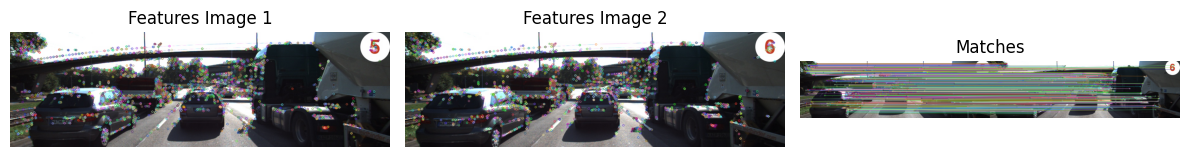

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Placeholder for filter_matches function
def filter_matches(kp1, kp2, raw_matches, ratio_thresh=0.75):
    good = []
    p1 = []
    p2 = []
    kp_pairs = []

    for m, n in raw_matches:  # Iterate through the raw matches
        if m.distance < ratio_thresh * n.distance:  # Apply the ratio test
            good.append(m)
            p1.append(kp1[m.queryIdx].pt)  # Get the point from img1
            p2.append(kp2[m.trainIdx].pt)  # Get the point from img2
            kp_pairs.append((kp1[m.queryIdx], kp2[m.trainIdx]))  # Store keypoint pairs

    return np.float32(p1), np.float32(p2), kp_pairs, good

# Placeholder for explore_match function
def explore_match(window_name, img1, img2, kp1, kp2, good, status, H):
    vis = cv.drawMatches(img1, kp1, img2, kp2, good, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    return vis

# Path of image 1
path1 = "./images/img0005.jpg"

# Path of image 2
path2 = "./images/img0006.jpg"

img1 = cv.imread(path1) 
img2 = cv.imread(path2) 

detector = cv.BRISK_create()
norm = cv.NORM_HAMMING

# Finding features
kp1, desc1 = detector.detectAndCompute(img1, None)
kp2, desc2 = detector.detectAndCompute(img2, None)

result1 = cv.drawKeypoints(img1, kp1, None)
cv.imwrite("features1.jpg", result1)
result2 = cv.drawKeypoints(img2, kp2, None)
cv.imwrite("features2.jpg", result2)

# Finding matches
FLANN_INDEX_LSH = 6
flann_params = dict(algorithm=FLANN_INDEX_LSH,
                    table_number=6,  # 12
                    key_size=12,      # 20
                    multi_probe_level=1)  # 2
matcher = cv.FlannBasedMatcher(flann_params, {})
raw_matches = matcher.knnMatch(desc1, trainDescriptors=desc2, k=2)

# Finding good matches
p1, p2, kp_pairs, good = filter_matches(kp1, kp2, raw_matches)

if len(p1) >= 4:
    H, status = cv.findHomography(p1, p2, cv.RANSAC, 5.0)
    print('%d / %d inliers/matched' % (np.sum(status), len(status)))
else:
    H, status = None, None
    print('%d matches found, not enough for homography estimation' % len(p1))

vis = explore_match("win", img1, img2, kp1, kp2, good, status, H)
cv.imwrite("match.jpg", vis)

# Displaying the images
plt.figure(figsize=(12, 8))

# Display the first image with keypoints
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(result1, cv.COLOR_BGR2RGB))
plt.title("Features Image 1")
plt.axis('off')

# Display the second image with keypoints
plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(result2, cv.COLOR_BGR2RGB))
plt.title("Features Image 2")
plt.axis('off')

# Display the matches image
plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(vis, cv.COLOR_BGR2RGB))
plt.title("Matches")
plt.axis('off')

plt.tight_layout()
plt.show()
